# Welcome to Introduction to Artificial Intelligence and Machine Learning
## Dr Basel Barakat and Prof John Murray
### Monday 3 May 2024

### Aims of the workshop
### This workshop dives into the world of Artificial Intelligence (AI) by equipping you with the necessary skills in two key areas.
#### Part 1: Introduction to Python Programming: We'll kick things off by building a solid foundation in Python. Python is a powerful and versatile programming language widely used in AI development due to its readability and extensive libraries.
#### Part 2: Developing AI Models: Once you're comfortable with Python, we'll move on to the exciting world of AI model development. You'll learn the fundamentals of creating AI models and gain hands-on experience bringing them to life.

###                                                     Feel free to discuss your work with peers, or with any member of the teaching staff.


## Part 2: Introduction to AI & ML 

Artificial Intelligence? 

Programming computers to behave in ways considered in humans/animals as intelligent. 

Theory --> model to test --> Useful systems



Machine learning is a subfield of artificial intelligence that focuses on the development of algorithms and statistical models that enable computers to improve their performance on a specific task through the use of data, without being explicitly programmed. It involves the study of computer algorithms that can learn from and make predictions or decisions based on data.


### Search in AI

### We will start with a simple problem that is the coin change problem. 

The goal of this problem is to determine the minimum number of coins needed to make a particular amount of change. 

The problem can be stated as follows: given a set of coin denominations and a target amount of change, the objective is to find the minimum number of coins required to make up that amount. 

Each coin has a specific value, and the goal is to minimize the total number of coins used while achieving the desired sum. 

The coin change problem is a well-known problem in the field of computer science and has various real-world applications, such as in vending machines, currency systems, and financial transactions.

Let us start with an example, say we have the following coin values 1p, 2p, 5p, 10p, 20p, 50p, 100p, 200p. What is the minimum number of coins to make a 93p.



In [2]:
def coin_change(coins, amount):
    coins.sort(reverse=True)  # Sort the coins in descending order
    coin_count = 0  # Variable to keep track of the total number of coins used
    change = []  # List to store the coins used

    for coin in coins:
        while amount >= coin:
            amount -= coin
            coin_count += 1
            change.append(coin)

    if amount == 0:
        print(f"Minimum number of coins required: {coin_count}")
        print("Coins used:", change)
    else:
        print("Not possible to get the desired change with the coins.")

coins = [1, 2, 5, 10, 20, 50, 100, 200] # List of available coins
amount = 93 # Amount for which we need to find the minimum number of coins

coin_change(coins, amount)

Minimum number of coins required: 5
Coins used: [50, 20, 20, 2, 1]


lets try diffrent amounts 

In [4]:
amount = 5527 # Amount for which we need to find the minimum number of coins

coin_change(coins, amount)

Minimum number of coins required: 31
Coins used: [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 100, 20, 5, 2]


### Introduction to Machine Learning 

#### Linear Regression  

We will be using the same spreadsheet we used in the last part 

In [7]:
import pandas as pd
file_name = 'student-mat.csv'
df = pd.read_csv(file_name, sep=';')
display(df)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In this example we  use machine learning to predict the students grade in the third exam (G3) from the second one (G2) 

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [17]:

# Selecting the feature and target variables
X = df[['G1']]  # Feature variable
y = df['G3']           # Target variable



Split the data to train and test

In [18]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now we can define the model we will use and train it using the .fit tool:


In [19]:
# Creating and fitting the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Now we can use the model to predict the test set. 


In [20]:
# Predicting the target values
y_pred = model.predict(X_test)

In [21]:
# Calculating R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.6959638345717838


To visualise the performance, we can use:


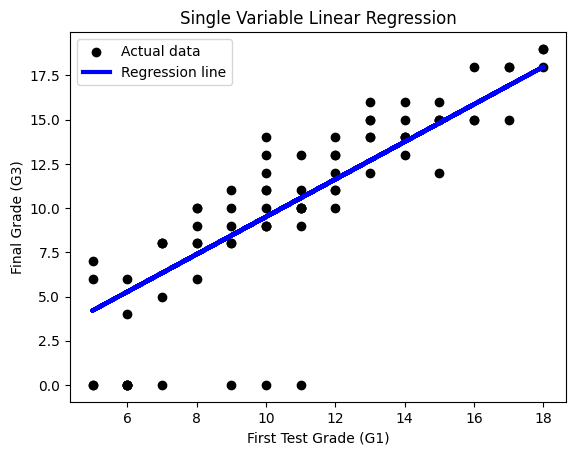

In [22]:

# Plotting the data points and the regression line
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression line')
plt.title('Single Variable Linear Regression')
plt.xlabel('First Test Grade (G1)')
plt.ylabel('Final Grade (G3)')
plt.legend()
plt.show()

#### Q: rewrite the example to predict the thrid exam mark from the second one and compare the results  

In [ ]:
# please solve it bellow






#### Introduction to Classification  


The Breast Cancer Wisconsin (Diagnostic) dataset is a popular resource used in machine learning for cancer diagnosis. It's available on the UCI Machine Learning Repository.

Here's a quick breakdown:

    Task: Classifying breast cancer as malignant or benign.
    Data: The dataset contains information on 569 patients, each described by 30 features extracted from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe characteristics of the cell nuclei present in the image.
    Source: The data is believed to be from the University of Wisconsin Hospitals.

Overall, this dataset is a valuable tool for researchers developing machine learning models for breast cancer diagnosis.

In [28]:
# Importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# Use the dataset from sklearn library
from sklearn.datasets import load_breast_cancer


Load a breast cancer dataset

In [25]:

# Loading the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names


Now we can start analysing the dataset, to get a better understanding of it. Initially we can assess the classes distribution as follows:


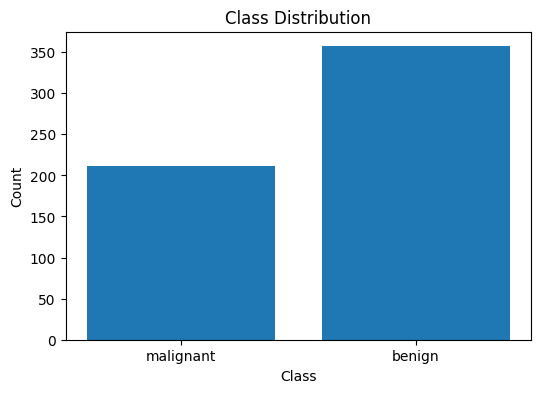

In [29]:

# Visualizing the classes distribution
plt.figure(figsize=(6, 4))
plt.bar(target_names, np.bincount(y))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


To train a model that we can use in real world we need to ensure that it is able to classify correctly, thus it has learned the correct patters to be able to classify correctly. 

Thus we need to test it on a part of the data that it did not see in its training, i.e., the test set, and we can do it as follows:


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scale the data to ensure that the model is not biased 

In [32]:
scaler = StandardScaler() # Feature scaling
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now we can train the model 

In [33]:
# Fitting logistic regression to the training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Since now we have a trained model, we can use it to predict the classes of the test data as follows:


In [34]:
# Predicting the test set results
y_pred = classifier.predict(X_test)

To asse the performance of the classifier we can use the accuracy and other confusion matrix as follows: 


In [35]:
# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
 [[41  2]
 [ 1 70]]


We can visualise the matrix as follows:

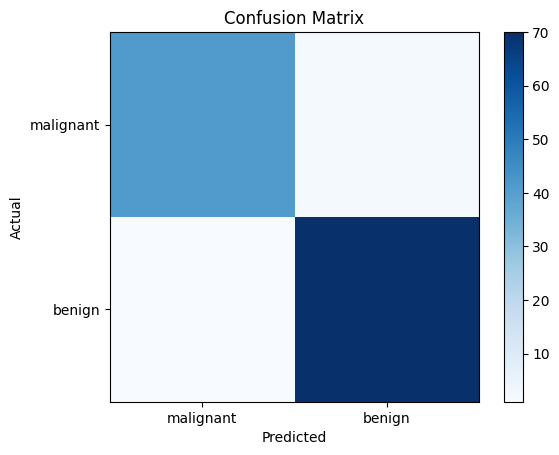

In [36]:
# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, target_names)
plt.yticks(tick_marks, target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Introduction to Computer Vision

Will start by importing the libraries. 


In [40]:
# pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB ? eta 0:00:00
  Using cached Markdown-3.6-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/376.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.9 MB 9.9 MB/s eta 0:00:39
   ---------------------------------------- 0.8/376.9 MB 8.0 MB/s eta 0:00:48
   ---------------------------------------- 1.1/376.9 MB 8.4 MB/s eta 0:00:45
   ---------------------------------------- 1.6/376.9 MB 9.3 MB/s eta 0:00:41
   ---------------------------------------- 2.0/376.9 MB 9.3 MB/s eta 0:00:41
   -----------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [45]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.datasets import mnist

Load the dataset and split it intro train and test.

Load the MNIST dataset

In [46]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [47]:
# Reshape the images and normalize pixel values to be between 0 and 1
X_train = X_train.reshape(-1, 28, 28, 1).astype('float64') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float64') / 255.0

Visualise an example of the images and their labels.

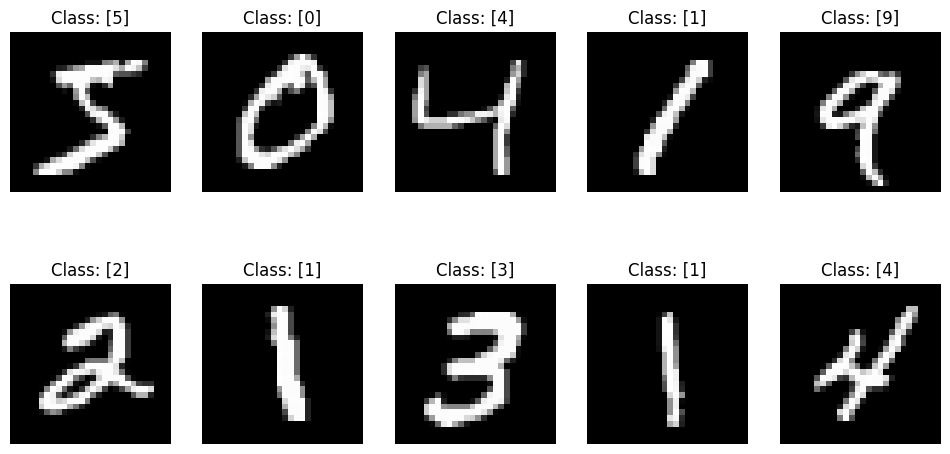

In [49]:
# Display images and corresponding class names
num_rows, num_cols = 2, 5  # Display 2 rows and 5 columns of images
plt.figure(figsize=(12, 6))

for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Class: {[y_train[i]]}')
    plt.axis('off')

plt.show()

Encode the label names using:

In [50]:

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

To implement the model, we can use:


In [52]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\engba\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train the model, please note that training it will take few mins.



In [54]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8692 - loss: 0.4409 - val_accuracy: 0.9792 - val_loss: 0.0637
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9821 - loss: 0.0573 - val_accuracy: 0.9837 - val_loss: 0.0482
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9866 - loss: 0.0410 - val_accuracy: 0.9897 - val_loss: 0.0315
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9921 - loss: 0.0258 - val_accuracy: 0.9889 - val_loss: 0.0338
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9928 - loss: 0.0233 - val_accuracy: 0.9910 - val_loss: 0.0277


Finally evaluate its performance:

In [55]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9883 - loss: 0.0327
Test Accuracy: 99.10%


To show the correctly calssisfied images and the misclassifed images we use: 

In [56]:

# Predictions on the test set
predictions = model.predict(X_test)

# Find indices of correctly and incorrectly classified images
correct_indices = np.where(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))[0]
incorrect_indices = np.where(np.argmax(predictions, axis=1) != np.argmax(y_test, axis=1))[0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


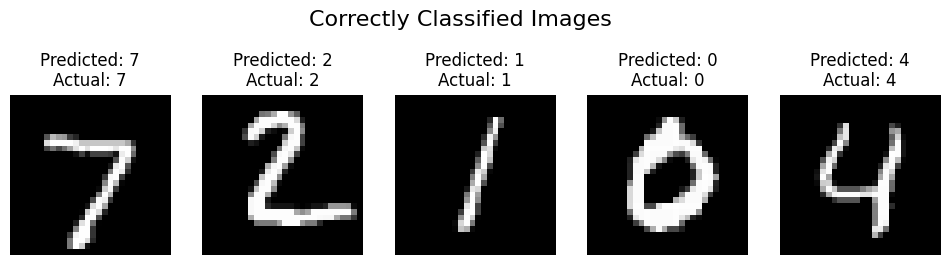

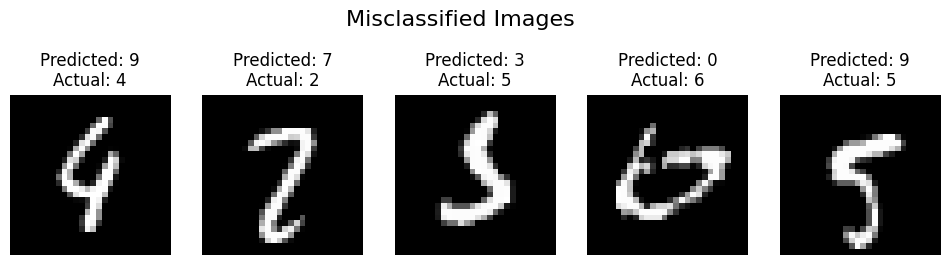

In [59]:
# Display examples of correctly classified images
plt.figure(figsize=(12, 6))
plt. suptitle('Correctly Classified Images', fontsize=16)

for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt. imshow(X_test[correct_indices[i]].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[correct_indices[i]])}\nActual: {np.argmax(y_test[correct_indices[i]])}')
    plt.axis('off')

# Display examples of misclassified images
plt.figure(figsize=(12, 6))
plt. suptitle('Misclassified Images', fontsize=16)

for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[incorrect_indices[i]].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[incorrect_indices[i]])}\nActual: {np.argmax(y_test[incorrect_indices[i]])}')
    plt.axis('off')

plt. show()